In [2]:
# for recall clean df (after EDA)
%store -r billboard_df_eda 

In [7]:
# import for SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
# basics
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [3]:
billboard_df_eda.head(1)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.59,0.57,...,0.75,0.07,0.4,0.08,0.2,0.63,117.76,3.89,22.16,other


# things to do before SVM

In [4]:
#make list of maingenere top 17 (more than 100 songs)
list_top_17 = list(billboard_df_eda.maingenere.value_counts()[:17].index)
#list(list_top_17.index)
list_top_17

['pop',
 'rock',
 'other',
 'soul',
 'rap',
 'country',
 'disco',
 'jazz',
 'blues',
 'funk',
 'dance',
 'metal',
 'folk',
 'house',
 'indie',
 'r&b',
 'latin']

In [5]:
#df_17maingenre=billboard_df[billboard_df.maingenere.value_counts()[:17]]
#df_17maingenre.head(5)
df_maingenere_more_100 = billboard_df_eda[billboard_df_eda.maingenere.isin(list_top_17)]
#billboard_df.maingenere[genere_more_100]
display(df_maingenere_more_100.maingenere.value_counts())

maingenere
pop        7590
rock       5156
other      4167
soul       2499
rap        2259
country    2218
disco       602
jazz        404
blues       397
funk        351
dance       347
metal       307
folk        305
house       242
indie       178
r&b         158
latin       139
Name: count, dtype: int64

In [6]:
# df with only the 17 meingenre 
df_maingenere_more_100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27319 entries, 0 to 29502
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          27319 non-null  int64  
 1   SongID                         27319 non-null  object 
 2   Performer                      27319 non-null  object 
 3   Song                           27319 non-null  object 
 4   spotify_genre                  27319 non-null  object 
 5   spotify_track_duration_minute  27319 non-null  float64
 6   spotify_track_explicit         27319 non-null  object 
 7   spotify_track_album            27319 non-null  object 
 8   danceability                   27319 non-null  float64
 9   energy                         27319 non-null  float64
 10  key                            27319 non-null  float64
 11  loudness                       27319 non-null  float64
 12  mode                           27319 non-null  floa

## **We want to classify the songs using SVM** 

In [8]:
# First we have to identify the features
features=df_maingenere_more_100[['danceability','energy','key','loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence','time_signature','tempo','spotify_track_duration_minute']]
target=df_maingenere_more_100.maingenere

In [9]:
# standardize the variables before use it
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# try with the first SVM
svm = SVC(kernel='rbf',C=1) 
# we use the RADIAL BASICS FUNTION as a kernel
# C is our regualization parameter

# we initialize the SVM
svm.fit(scaled_features, df_maingenere_more_100.maingenere)

SVC(C=1)

In [12]:
# in order to make prediction --> da vedere meglio 
prediction=svm.predict(scaled_features)

In [13]:
# Dimensionality reduction with t-SNE for visualization --> in order to plot it and see the results
# since we have many features, visualizing them directly can be difficult

# t-SNE helps reduce the dimensionality to 2D or 3D for plotting

tsne = TSNE(n_components=2, random_state=42) # Reduce to 2 dimensions
reduced_features = tsne.fit_transform(scaled_features)

In [14]:
# used to convert categorical labels (like genre names in your case) into numerical labels that can be used for visualization 
# use for visualize in the point next

le = LabelEncoder()
numerical_labels = le.fit_transform(prediction)

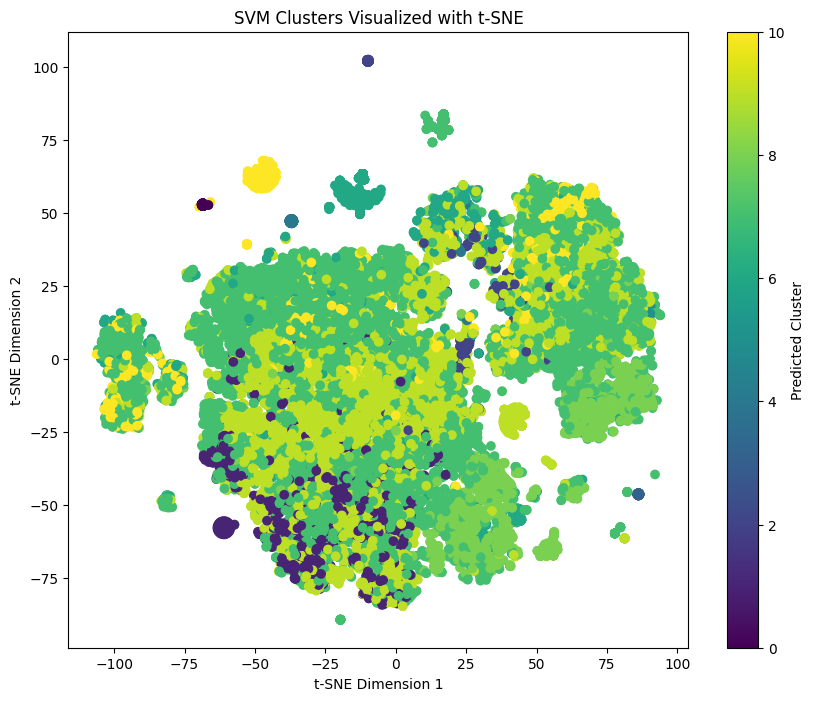

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=numerical_labels,cmap='viridis')
plt.title('SVM Clusters Visualized with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Predicted Cluster')
plt.show()
